In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.core.debugger import set_trace

# Linear regression

In [2]:
class Regression:
  
  def __init__(self,eta=0.001,n_iter=100):
    self.eta = eta
    self.n_iter=n_iter
    
  def output(self,X):
    return np.dot(X,self.w[1:]) + self.w[0]
  
  def train(self,X,y, polinomial=False):
          
    self.w = np.random.random(X.shape[1]+1)
    self.cost=[]
    m=X.shape[0]
    for i in range(self.n_iter):
      e = self.output(X) - y
      
      self.w[1:]-=self.eta*np.dot(e.T,X)/m
      self.w[0]-=self.eta*e.sum()/m
      
      self.cost.append((e**2).sum()/(2*m))
      
    return self
  
  def predict(self,X):
    return self.output(X)

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


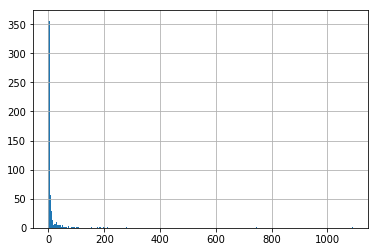

In [5]:
df.area.hist(bins=df.area.nunique())

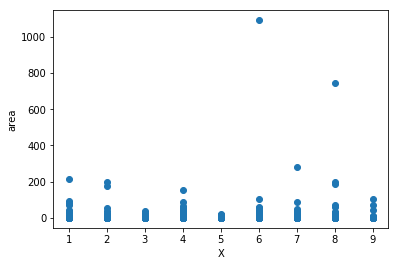

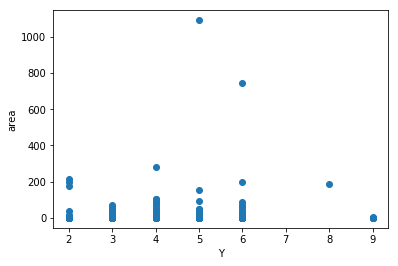

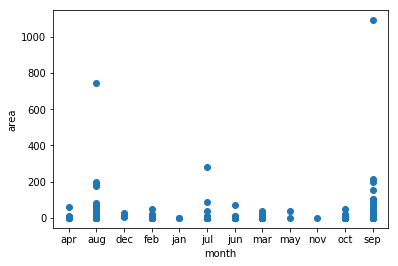

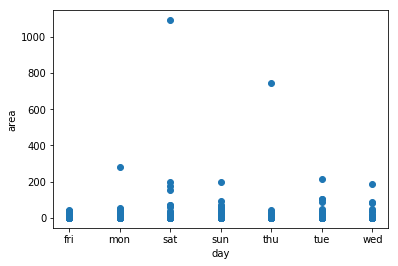

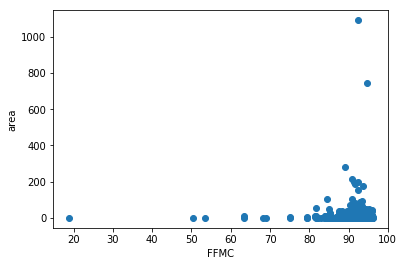

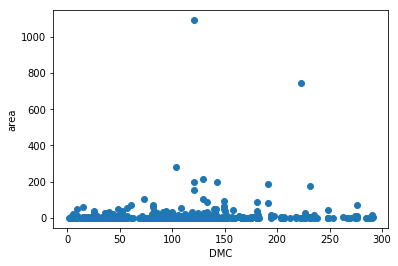

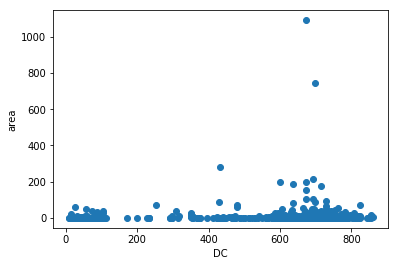

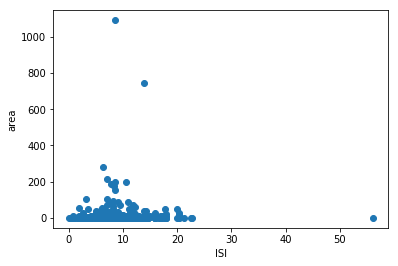

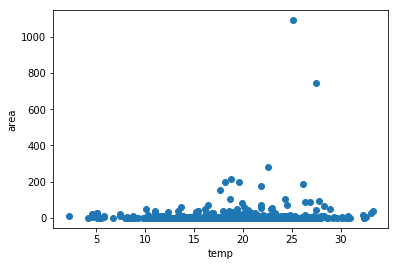

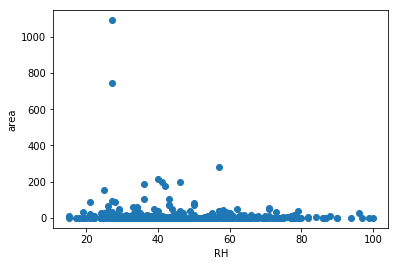

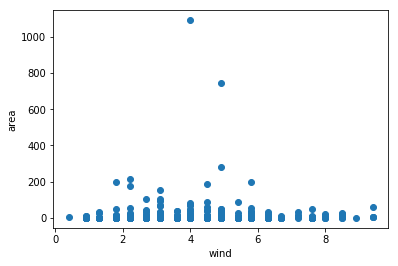

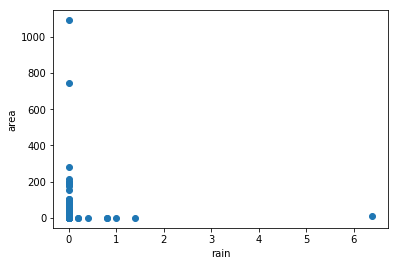

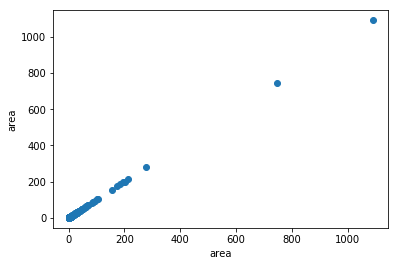

In [6]:
for col in df:
  plt.scatter(x=df[col],y=df['area'])
  plt.xlabel(col)
  plt.ylabel('area')
  plt.show()

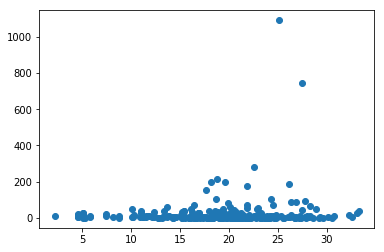

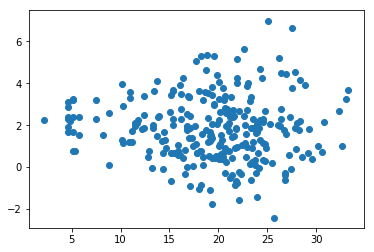

In [7]:
clear = df[df.area>0]
plt.scatter(clear.temp,clear.area)
plt.show()
plt.scatter(clear.temp,clear.area.apply(lambda x : np.log(x)))
plt.show()

In [8]:
clear = df[df.area>0]
X = np.reshape(clear.temp, (clear.shape[0], 1))
y = clear.area
model = Regression().train(X,y)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


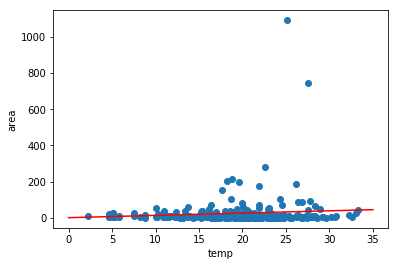

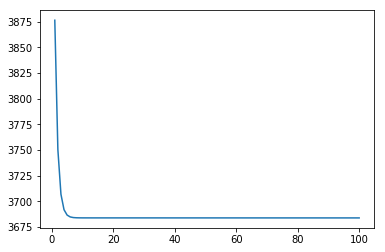

In [9]:
x=np.reshape(np.linspace(0,35,300), (300,1))

fig,ax = plt.subplots()

ax.plot(x, model.predict(x), c='r')
ax.scatter(clear.temp,clear.area)
ax.set_ylabel('area')
ax.set_xlabel('temp')

plt.show()

plt.plot(range(1,model.n_iter+1),model.cost)
plt.show()

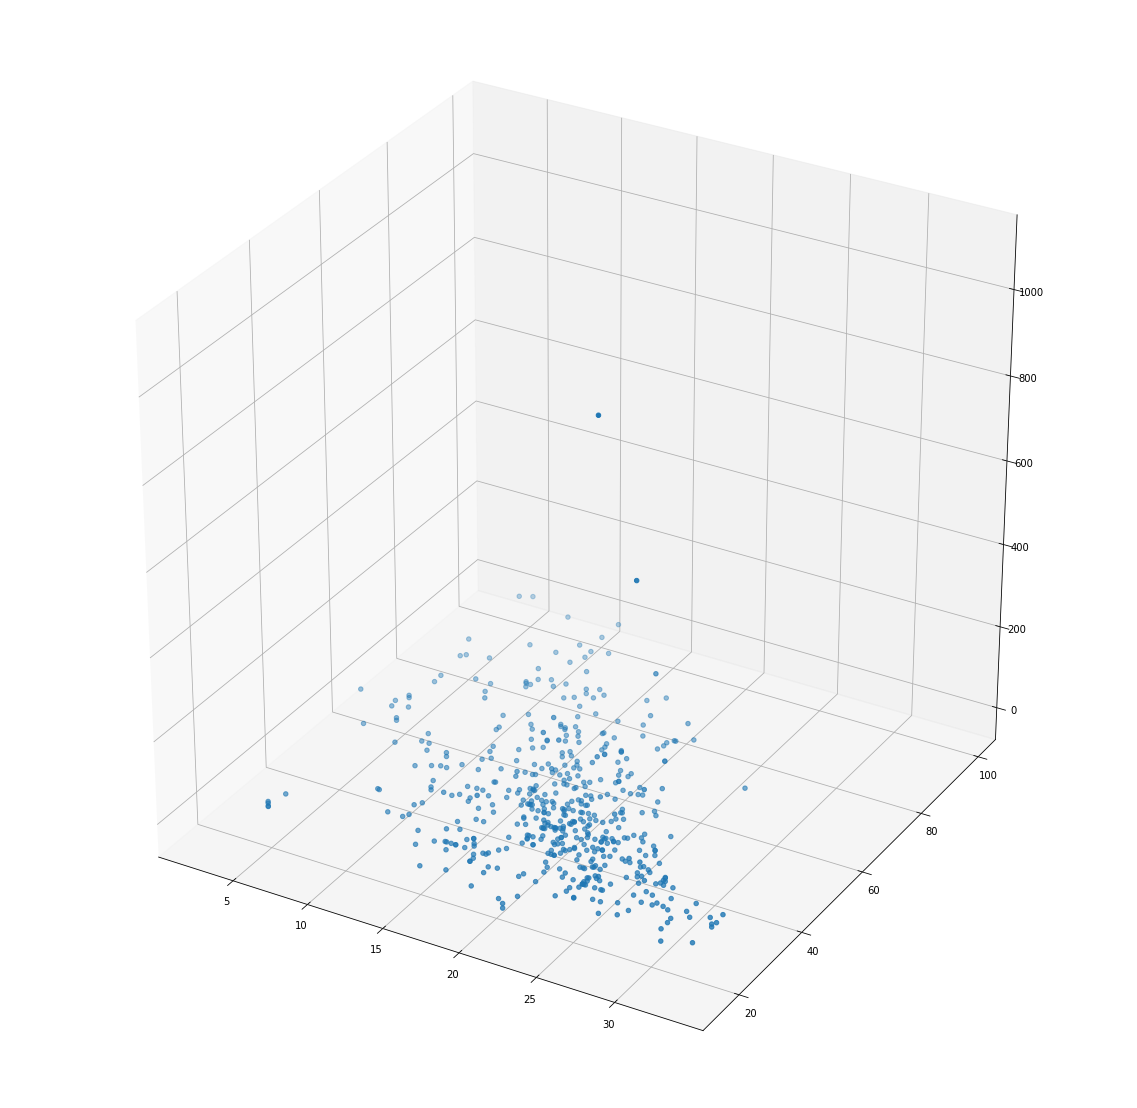

In [10]:
%matplotlib inline 
#notebook
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

ax.scatter3D(df['temp'],df['RH'],df['area'])

[ 0.45971684  1.58230261 -0.16021629]


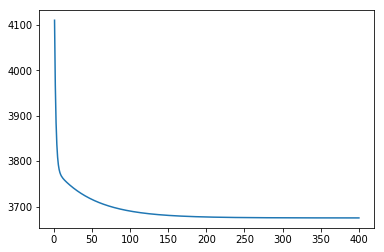

In [11]:
multi_X = clear[['temp','RH']].values.reshape(clear.shape[0],2)
multi_model = Regression(eta=0.0001,n_iter=400).train(multi_X,y)

print(multi_model.w)
plt.plot(range(1,multi_model.n_iter+1),multi_model.cost)

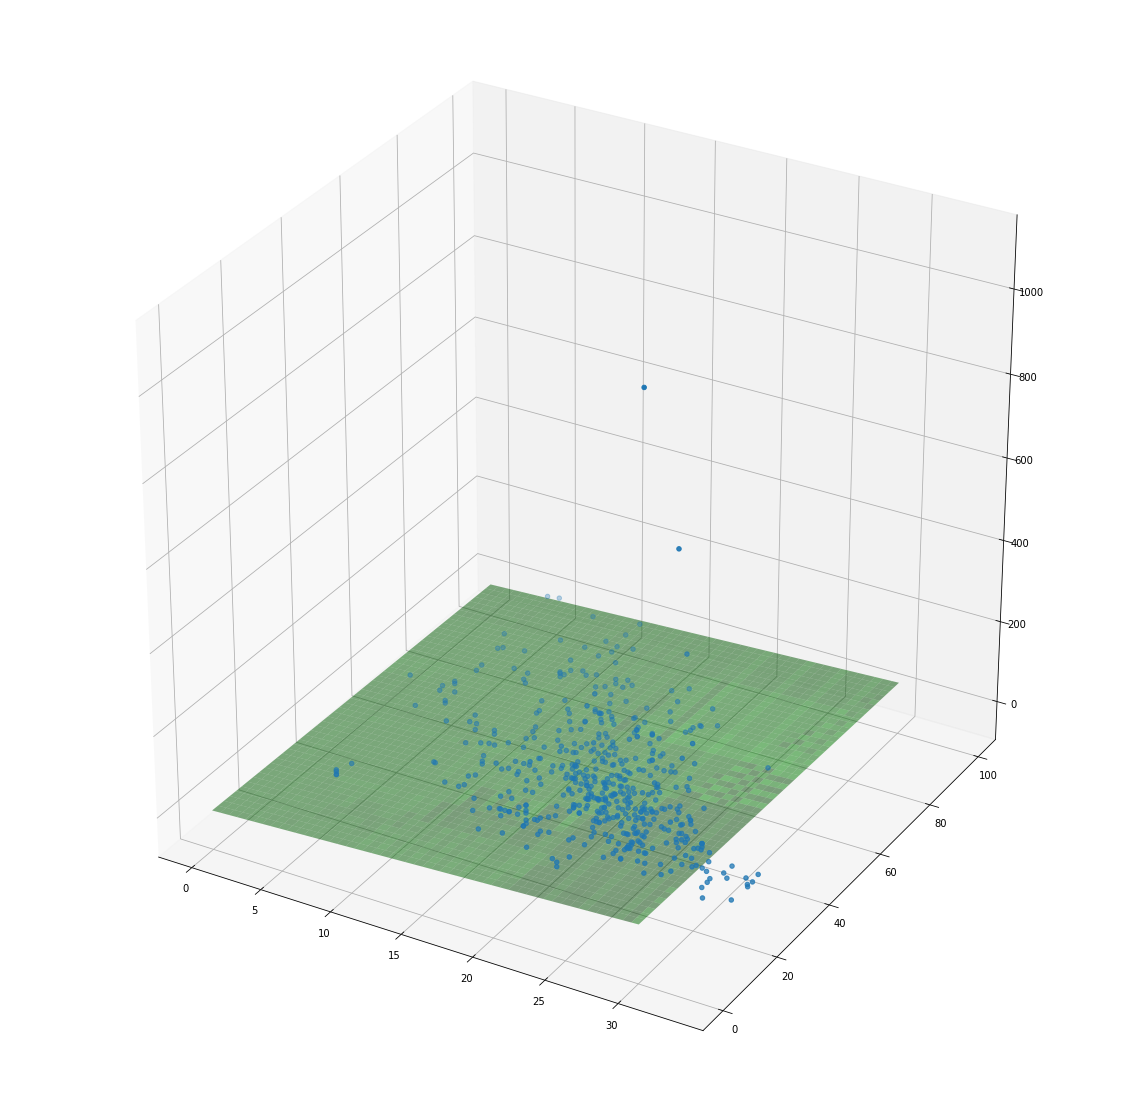

In [12]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter3D(df['temp'],df['RH'],df['area'])

xs,ys = np.meshgrid(np.linspace(0,30,300),np.linspace(0,100,1000))
zs = lambda x,y: multi_model.w[0] + multi_model.w[1]*x + multi_model.w[2]*y

ax.plot_surface(xs,ys,zs(xs,ys), color='green', alpha=0.5)

# Logistic regression

In [13]:
df_iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', \
                     names=['sep_len','sep_wid','pet_len','pet_wid','type'])
df_iris['target1'] = np.where(df_iris.type=='Iris-setosa', 1,0)
df_iris['target2'] = np.where(df_iris.type=='Iris-versicolor', 1,0)
df_iris['target3'] = np.where(df_iris.type=='Iris-virginica', 1,0)

print(df_iris.shape)
df_iris.head()

(150, 8)


,sep_len,sep_wid,pet_len,pet_wid,type,target1,target2,target3
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [14]:
class LogisticRegression:
  
  def __init__(self,eta=0.05,n_iter=100, seed=14):
    np.random.seed(seed)
    self.eta = eta
    self.n_iter=n_iter
  
  def logit(self, X, w):
    return 1/(1 + np.exp(-(np.dot(X,w[1:]) + w[0])))        
   
  def train(self,X,y):
    m=X.shape[0]
    self.w = np.random.random(X.shape[1]+1)
    self.cost=[]
    
    for i in range(self.n_iter):
      h = self.logit(X,self.w)
      
      self.w[1:]-=self.eta*np.dot((h-y).T,X)/m
      self.w[0]-=self.eta*(h-y).sum()/m
      
      self.cost.append(-(y.T.dot(np.log(h))+(1-y).T.dot(np.log(1-h)))/m)
      
    return self
    
  def predict(self,X):
    return np.where(self.logit(X, self.w)>=0.5, 1,0) 

(100, 4)


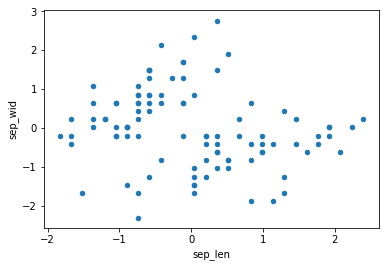

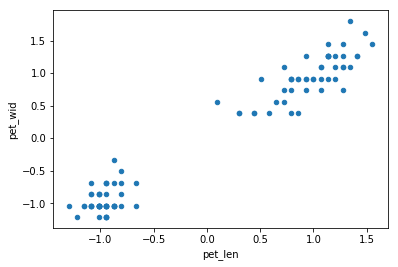

In [15]:
X_iris = df_iris.iloc[:100,:4]
X_iris = (X_iris - X_iris.mean())/X_iris.std(ddof=0)

print(X_iris.shape)
X_iris.plot.scatter('sep_len','sep_wid')
X_iris.plot.scatter('pet_len','pet_wid')

[ 0.07490179 -0.93983529  1.74847698 -2.12788942 -1.85104555]
[0.0071707675339669485, 0.007138217358972321, 0.00710598381501292, 0.007074062187927648, 0.007042447857871752, 0.007011136296951535, 0.006980123066930332, 0.00694940381700327, 0.0069189742816381395]


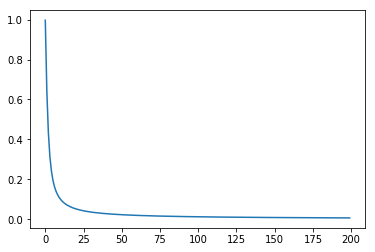

In [16]:
model_logit = LogisticRegression(eta=0.4, n_iter=200).train(X_iris,df_iris.iloc[:100,-3])
print(model_logit.w)
print(model_logit.cost[-10:-1])
plt.plot(range(model_logit.n_iter),model_logit.cost)

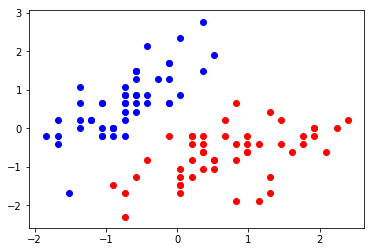

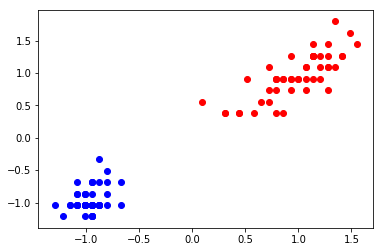

In [17]:
classified_x = X_iris.iloc[:,:].values
classified_target = model_logit.predict(classified_x)

a = classified_x[classified_target == 0]
plt.scatter(a[:,0],a[:,1], c='r')

b = classified_x[classified_target == 1]
plt.scatter(b[:,0],b[:,1], c='b')

plt.show()

c = classified_x[classified_target == 0]
plt.scatter(a[:,2],a[:,3], c='r')

d = classified_x[classified_target == 1]
plt.scatter(b[:,2],b[:,3], c='b')

plt.show()

# Multiclass regression

In [18]:
class MulticlassRegression(LogisticRegression):
    
    def __init__(self,eta=0.01,n_iter=100):
        super().__init__(eta,n_iter)
    
    def train(self, X,y, *args):
        super().train(X,y)
        self._w = [self.w]
        self._cost = [self.cost]
        
        for i in range(0,len(args),2):
            super().train(args[i], args[i+1])
            self._w.append(self.w)
            self._cost.append(self.cost)
            
        self.w = np.array(self._w)
        self.cost = np.array(self._cost)
                
        return self
               
    def predict(self, X):      
        y = []
        for w in self.w:
            y.append(super().logit(X, w))
        y = np.array(y)
        return (y == y.max(axis=0, keepdims=1)).astype(int)

In [19]:
model_multi_logit = MulticlassRegression(eta=0.05, n_iter=200) \
    .train( \
           df_iris.iloc[:,:4], df_iris.iloc[:,-3], \
           df_iris.iloc[:,:4], df_iris.iloc[:,-2], \
           df_iris.iloc[:,:4], df_iris.iloc[:,-1], \
          )

[ 0.49862152  0.13706706  1.09883548 -1.61231386 -0.35946882]
[0.05365314 0.05343562 0.05321994 0.05300607 0.05279399 0.05258368
 0.05237512 0.05216829 0.05196315]
[ 0.8617323  -0.19110104 -0.60687318  0.3721182  -0.08120064]
[0.56912868 0.56903453 0.56894059 0.56884685 0.56875332 0.56865998
 0.56856685 0.56847391 0.56838117]
[ 0.38620409 -0.85801742 -0.598607    0.92160722  1.36514316]
[0.2852801  0.28486825 0.28445889 0.28405199 0.28364751 0.28324542
 0.2828457  0.28244832 0.28205324]


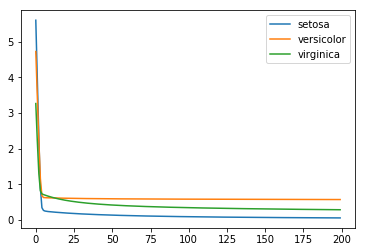

In [20]:
for i in [0,1,2]:
    print(model_multi_logit.w[i])
    print(model_multi_logit.cost[i][-10:-1])

for cost,label in zip(np.array(model_multi_logit.cost), ['setosa','versicolor','virginica']):
    plt.plot(range(model_multi_logit.n_iter), cost, label=label)
    plt.legend()    

Index(['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'type', 'target1',
       'target2', 'target3'],
      dtype='object')


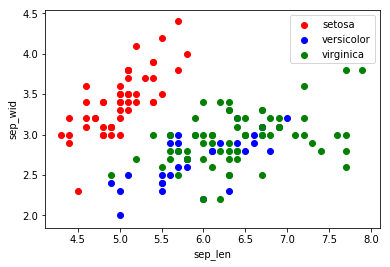

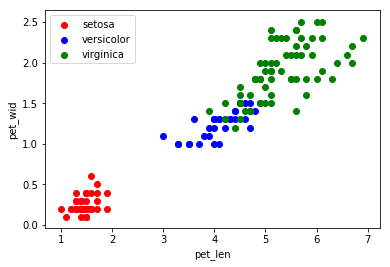

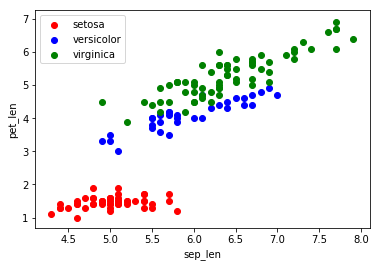

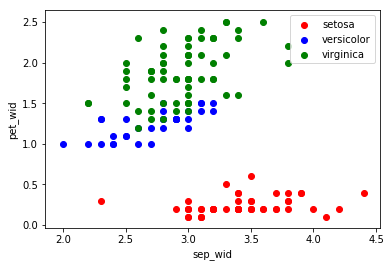

In [21]:
print(df_iris.columns)

multi_iris_x = df_iris.iloc[:,:4].values
classes = model_multi_logit.predict(df_iris.iloc[:,:4].values)
colors = ['r','b','g']
labels = ['setosa','versicolor','virginica']


for c, i in zip(np.array(classes), [0,1,2]):    
    a = multi_iris_x[c == 1]
    plt.scatter(a[:,0],a[:,1], c=colors[i], label=labels[i])
    plt.xlabel('sep_len')
    plt.ylabel('sep_wid')
    
plt.legend()    
plt.show()
    
for c, i in zip(np.array(classes), [0,1,2]):    
    b = multi_iris_x[c == 1]
    plt.scatter(b[:,2],b[:,3], c=colors[i], label=labels[i])
    plt.xlabel('pet_len')
    plt.ylabel('pet_wid')
    
plt.legend()    
plt.show()


for c, i in zip(np.array(classes), [0,1,2]):    
    a = multi_iris_x[c == 1]
    plt.scatter(a[:,0],a[:,2], c=colors[i], label=labels[i])
    plt.xlabel('sep_len')
    plt.ylabel('pet_len')
    
plt.legend()    
plt.show()
    
for c, i in zip(np.array(classes), [0,1,2]):    
    b = multi_iris_x[c == 1]
    plt.scatter(b[:,1],b[:,3], c=colors[i], label=labels[i])
    plt.xlabel('sep_wid')
    plt.ylabel('pet_wid')
    
plt.legend()    
plt.show()
    

# KNN

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

df_knn = datasets.load_iris()
X_knn = df_knn.data
y_knn = df_knn.target

X_train, X_test, y_train, y_test = train_test_split(X_knn,y_knn, test_size=0.3, random_state=43)

In [23]:
class KNN:

    def fit(self, X, y, distance=lambda ins1, ins2: np.linalg.norm(ins1-ins2)):
        self.X_train, self.y_train, self.dist = X, y, distance
        return self
    
    def predict(self, X, k_number=3, verbose=False):
        result = []
        for x in zip(X_test):
            idx, xnbrs = self.get_knn(x, k_number)
            result.append(self.vote(self.y_train[idx]))
            
            if verbose:
                print('\n data: ', x, \
                      '\n vote result: ', result[-1], \
                      '\n nearest: ', (idx, xnbrs))
        
        return np.array(result)
        

    def get_knn(self, instance, k):
        idx = np.argpartition(np.apply_along_axis(self.dist, 1, self.X_train, instance), k)[:k]
        return idx, self.X_train[idx]

    def vote(self, nbrs):
        values = np.unique(nbrs)
        n = dict(zip(values,np.zeros(values.shape)))
        for i in nbrs:
            n[i]+=1

            max_value = s = 0
        for k, v in n.items():
            s+=v
            if v>=max_value:
                max_label, max_value = k, v

        return [max_label, max_value/s]

In [24]:
knn_classifier = KNN().fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print('# wrong classified: ',(y_pred[:,0] != y_test).sum())

# wrong classified:  0


# Bayesian classifier

### (TODO: implement vectorization)

In [25]:
df_bayes=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',\
            header=None)
df_bayes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
class NaiveBayesClassifier():
    
    def train(self, training_set):
        self.model_stats = training_set.groupby(training_set.columns[-1]).agg(['mean','std'])
        return self
        
    def norm(self, x,mean,std): 
        mean, std = np.array((mean,std))
        return (1/(std*(2*np.pi)**0.5))*np.exp(-((np.array(x)-mean)**2/(2*std**2)))
    
    def calculate_probabilities(self, vector, stats, mean_name='mean', std_name='std'):
        result = {} 
        
        for label in stats.index.values:            
            mean = stats.T.query('ilevel_1=="'+mean_name+'"')[label]
            std = stats.T.query('ilevel_1=="'+std_name+'"')[label]

            result[label]=np.sum(np.log(self.norm(vector,mean,std)), dtype=float)

        return result
    
    def predict(self, prediction_set):
        
        result = pd.DataFrame(index=prediction_set.index, columns=self.model_stats.index)
        
        for idx, sample in prediction_set.iterrows():
            result.loc[idx,:] = self.calculate_probabilities(sample, self.model_stats)
        
        return result.values.argmax(axis=1)
    
    def accuracy(self, predicted, actual):
        return np.sum((predicted == actual))/len(actual)

In [27]:
df_b_train = df_bayes.sample(frac=0.7)
df_b_test = df_bayes.iloc[df_bayes.index.difference(df_b_train.index)]

In [28]:
nb = NaiveBayesClassifier().train(df_b_train)

In [29]:
nb_pred = nb.predict(df_b_test.iloc[:,:-1])

In [30]:
nb.accuracy(nb_pred, df_b_test.iloc[:,-1])

0.7